In [1]:
import textacy
import pandas as pd
from textacy.extract import keyterms as kt

In [2]:
from load_data import get_df
df = get_df()
df.reset_index(inplace=True)

In [3]:
terms = []
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
for index in range(len(df)):
    doc = textacy.make_spacy_doc(df['Headline'][index], lang=en)
    output = kt.textrank(
        doc,
        normalize="lemma",
        window_size=10,
        edge_weighting="count",
        position_bias=True,
        topn=5,
    )
    for i in range(len(output)):
        terms.append(output[i][0])

In [4]:
len(terms)

2155

In [5]:
terms[:20]

['global economic environment',
 'fiscal crisis',
 'legacy',
 'Queen',
 'suffering',
 'ancestor',
 'Temple idol',
 'Jhenidah',
 'Chhatra Odhikar',
 'BCL man',
 'activist',
 'attack',
 'jail',
 'Shanghai Cooperation Organization Summit',
 'new context',
 'new direction',
 'Hoolock',
 'Ctg',
 'Gopalganj road crash',
 'unusual gift']

In [6]:
corpus = terms

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(
    max_df=0.8,
    max_features=1000,
    ngram_range=(1,3)
)

In [9]:
X = cv.fit_transform(corpus)

In [10]:
list(cv.vocabulary_.keys())[:10]

['global',
 'economic',
 'environment',
 'crisis',
 'queen',
 'chhatra',
 'odhikar',
 'chhatra odhikar',
 'bcl',
 'man']

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'man'),
 Text(2, 0, 'world'),
 Text(3, 0, 'new'),
 Text(4, 0, 'india'),
 Text(5, 0, 'dhaka'),
 Text(6, 0, 'death'),
 Text(7, 0, 'bank'),
 Text(8, 0, 'day'),
 Text(9, 0, 'iran'),
 Text(10, 0, 'covid'),
 Text(11, 0, 'power'),
 Text(12, 0, 'woman'),
 Text(13, 0, 'price'),
 Text(14, 0, 'govt'),
 Text(15, 0, 'ctg'),
 Text(16, 0, 'pm'),
 Text(17, 0, 'country'),
 Text(18, 0, 'dead'),
 Text(19, 0, 'ukraine')]

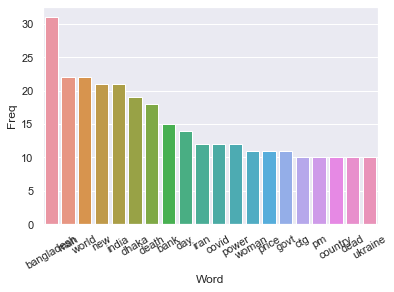

In [11]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

            Bi-gram  Freq
0         world cup     7
1     mental health     6
2          covid 19     5
3   positivity rate     5
4   chhatra odhikar     4
5       new zealand     4
6       nobel prize     4
7         t20 world     4
8            t20 wc     4
9           bcl man     3
10       road crash     3
11         19 death     3
12      mahsa amini     3
13      debt crisis     3
14    crimea bridge     3
15        sri lanka     3
16    home ministry     3
17      murder case     3
18       rmg worker     3
19      kabir suman     3


[Text(0, 0, 'world cup'),
 Text(1, 0, 'mental health'),
 Text(2, 0, 'covid 19'),
 Text(3, 0, 'positivity rate'),
 Text(4, 0, 'chhatra odhikar'),
 Text(5, 0, 'new zealand'),
 Text(6, 0, 'nobel prize'),
 Text(7, 0, 't20 world'),
 Text(8, 0, 't20 wc'),
 Text(9, 0, 'bcl man'),
 Text(10, 0, 'road crash'),
 Text(11, 0, '19 death'),
 Text(12, 0, 'mahsa amini'),
 Text(13, 0, 'debt crisis'),
 Text(14, 0, 'crimea bridge'),
 Text(15, 0, 'sri lanka'),
 Text(16, 0, 'home ministry'),
 Text(17, 0, 'murder case'),
 Text(18, 0, 'rmg worker'),
 Text(19, 0, 'kabir suman')]

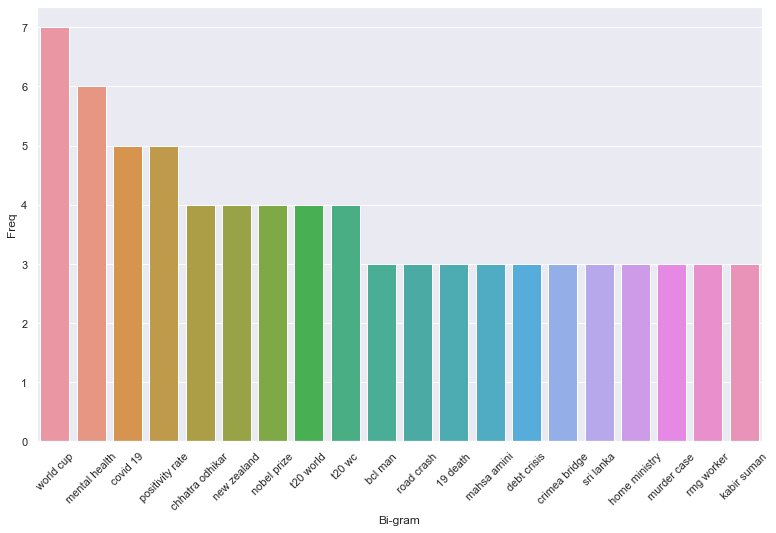

In [12]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                             Tri-gram  Freq
0                       t20 world cup     4
1                      covid 19 death     3
2          bangladesh wedding couture     2
3                wedding couture week     2
4                 dengue grip rooppur     2
5                  grip rooppur plant     2
6                natore al infighting     2
7               ghorashal power plant     2
8                 world mental health     2
9                   mental health day     2
10               lawmaker sheikh anne     2
11                   dui diner duniya     2
12                       t20 wc squad     2
13        global economic environment     1
14  shanghai cooperation organization     1
15    cooperation organization summit     1
16               gopalganj road crash     1
17                     oil output cut     1
18             human trafficking case     1
19                 winter night ghost     1


[Text(0, 0, 't20 world cup'),
 Text(1, 0, 'covid 19 death'),
 Text(2, 0, 'bangladesh wedding couture'),
 Text(3, 0, 'wedding couture week'),
 Text(4, 0, 'dengue grip rooppur'),
 Text(5, 0, 'grip rooppur plant'),
 Text(6, 0, 'natore al infighting'),
 Text(7, 0, 'ghorashal power plant'),
 Text(8, 0, 'world mental health'),
 Text(9, 0, 'mental health day'),
 Text(10, 0, 'lawmaker sheikh anne'),
 Text(11, 0, 'dui diner duniya'),
 Text(12, 0, 't20 wc squad'),
 Text(13, 0, 'global economic environment'),
 Text(14, 0, 'shanghai cooperation organization'),
 Text(15, 0, 'cooperation organization summit'),
 Text(16, 0, 'gopalganj road crash'),
 Text(17, 0, 'oil output cut'),
 Text(18, 0, 'human trafficking case'),
 Text(19, 0, 'winter night ghost')]

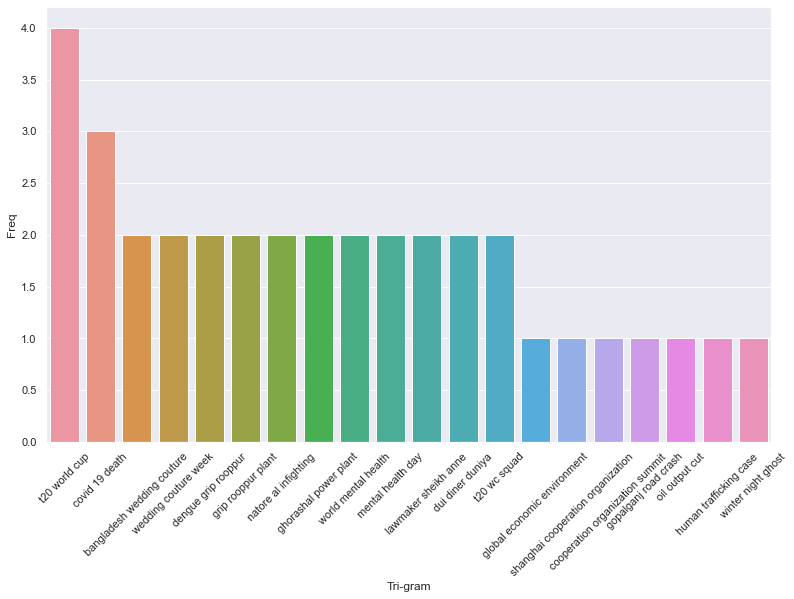

In [13]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
